In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv("/content/cars_24_combined.csv")

In [3]:
df.columns

Index(['Car Name', 'Year', 'Distance', 'Owner', 'Fuel', 'Location', 'Drive',
       'Type', 'Price'],
      dtype='object')

# Car name

In [37]:
df['Car Name']

,Car Name
0,Maruti S PRESSO
1,Hyundai Xcent
2,Tata Safari
3,Maruti Vitara Brezza
4,Tata Tiago
...,...
8010,Datsun Redi Go
8011,Toyota YARIS
8012,Volkswagen Ameo
8013,Hyundai GRAND I10 NIOS


In [38]:
df = df.drop_duplicates()
df = df.dropna(axis=0, how='any')
df = df.reset_index(drop=True)

print(df)


                    Car Name    Year  Distance  Owner    Fuel Location  \
0            Maruti S PRESSO  2022.0      3878      1  PETROL    HR-98   
1              Hyundai Xcent  2018.0     32041      1  PETROL    TN-22   
2                Tata Safari  2021.0     96339      1  DIESEL    TS-08   
3       Maruti Vitara Brezza  2019.0     51718      1  DIESEL    WB-24   
4                 Tata Tiago  2021.0     19811      1  PETROL    HR-51   
...                      ...     ...       ...    ...     ...      ...   
7796          Datsun Redi Go  2018.0     11500      1  PETROL    MH-01   
7797            Toyota YARIS  2018.0     73393      2  PETROL    KA-03   
7798         Volkswagen Ameo  2016.0     83810      2  PETROL    UP-78   
7799  Hyundai GRAND I10 NIOS  2019.0     39162      1  PETROL    CH-01   
7800              Tata TIGOR  2022.0     82009      2  PETROL    MH-02   

          Drive       Type    Price  
0        Manual  HatchBack   514000  
1        Manual      Sedan   674000

In [39]:
def extract_value_from_column(df, column, regex_pattern=None, split_index=None, new_column_name=None):
    #Extracts a value from a specified column using either regex or string splitting.

    if regex_pattern:
        #Extract using regex
        df[new_column_name] = df[column].str.extract(regex_pattern)
    elif split_index is not None:
        #Extract using string split
        df[new_column_name] = df[column].str.split().str[split_index]

    return df

In [40]:
def extract_make_from_title(df):
    #Extract Make
    return extract_value_from_column(df, 'Car Name', split_index=0, new_column_name='Make')

In [41]:
df

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000
...,...,...,...,...,...,...,...,...,...
7796,Datsun Redi Go,2018.0,11500,1,PETROL,MH-01,Manual,HatchBack,292000
7797,Toyota YARIS,2018.0,73393,2,PETROL,KA-03,Manual,Sedan,534000
7798,Volkswagen Ameo,2016.0,83810,2,PETROL,UP-78,Manual,Sedan,424000
7799,Hyundai GRAND I10 NIOS,2019.0,39162,1,PETROL,CH-01,Automatic,HatchBack,685000


In [42]:
df = extract_make_from_title(df)  #Creates Make column

In [16]:
df.columns

Index(['Car Name', 'Year', 'Distance', 'Owner', 'Fuel', 'Location', 'Drive',
       'Type', 'Price', 'Make'],
      dtype='object')

In [17]:
df['Make']

,Make
0,Maruti
1,Hyundai
2,Tata
3,Maruti
4,Tata
...,...
7796,Datsun
7797,Toyota
7798,Volkswagen
7799,Hyundai


In [44]:
cols_one_hot_encode = ['Make','Fuel','Drive','Type']

In [45]:
df_encoded = pd.get_dummies(df, columns=cols_one_hot_encode,dtype=int)



In [46]:
df = df_encoded.copy()

In [47]:
df

,Car Name,Year,Distance,Owner,Location,Price,Make_BMW,Make_Datsun,Make_Ford,Make_Honda,...,Fuel_DIESEL,Fuel_LPG,Fuel_PETROL,Drive_Automatic,Drive_Manual,Type_HatchBack,Type_Lux_SUV,Type_Lux_sedan,Type_SUV,Type_Sedan
0,Maruti S PRESSO,2022.0,3878,1,HR-98,514000,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,Hyundai Xcent,2018.0,32041,1,TN-22,674000,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,Tata Safari,2021.0,96339,1,TS-08,1952000,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,Maruti Vitara Brezza,2019.0,51718,1,WB-24,690000,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,Tata Tiago,2021.0,19811,1,HR-51,526000,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,Datsun Redi Go,2018.0,11500,1,MH-01,292000,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
7797,Toyota YARIS,2018.0,73393,2,KA-03,534000,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7798,Volkswagen Ameo,2016.0,83810,2,UP-78,424000,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7799,Hyundai GRAND I10 NIOS,2019.0,39162,1,CH-01,685000,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0


In [48]:
from sklearn.preprocessing import StandardScaler


In [49]:
df = df.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()

#Loop through the columns and apply StandardScaler conditionally
for column in df.columns:
    #Check if the column contains only 0s and 1s
    if set(df[column].dropna().unique()) == {0, 1}:
        continue  #Skip this column
    else:
        print(f"Scaling column: {column}")
        df[column] = scaler.fit_transform(df[[column]])


print(df)

Scaling column: Car Name
Scaling column: Year
Scaling column: Distance
Scaling column: Owner
Scaling column: Location
Scaling column: Price
      Car Name      Year  Distance     Owner  Location     Price  Make_BMW  \
0          NaN  1.740611 -1.819358 -0.586172       NaN -0.243338         0   
1          NaN  0.335877 -0.730522 -0.586172       NaN  0.357905         0   
2          NaN  1.389427  1.755364 -0.586172       NaN  5.160330         0   
3          NaN  0.687061  0.030229 -0.586172       NaN  0.418029         0   
4          NaN  1.389427 -1.203357 -0.586172       NaN -0.198244         0   
...        ...       ...       ...       ...       ...       ...       ...   
7796       NaN  0.335877 -1.524677 -0.586172       NaN -1.077562         0   
7797       NaN  0.335877  0.868227  1.374689       NaN -0.168182         0   
7798       NaN -0.366489  1.270968  1.374689       NaN -0.581537         0   
7799       NaN  0.687061 -0.455210 -0.586172       NaN  0.399240         0   
78

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unno

In [50]:
df = df.drop('Location', axis=1)
df = df.drop('Car Name', axis=1)


In [51]:
df.columns

Index(['Year', 'Distance', 'Owner', 'Price', 'Make_BMW', 'Make_Datsun',
       'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep', 'Make_KIA',
       'Make_MG', 'Make_Mahindra', 'Make_Maruti', 'Make_Nissan',
       'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Fuel_CNG', 'Fuel_DIESEL', 'Fuel_LPG', 'Fuel_PETROL',
       'Drive_Automatic', 'Drive_Manual', 'Type_HatchBack', 'Type_Lux_SUV',
       'Type_Lux_sedan', 'Type_SUV', 'Type_Sedan'],
      dtype='object')

In [52]:
X = df.drop('Price', axis=1)
y = df['Price']

In [53]:
X

,Year,Distance,Owner,Make_BMW,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_KIA,...,Fuel_DIESEL,Fuel_LPG,Fuel_PETROL,Drive_Automatic,Drive_Manual,Type_HatchBack,Type_Lux_SUV,Type_Lux_sedan,Type_SUV,Type_Sedan
0,1.740611,-1.819358,-0.586172,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0.335877,-0.730522,-0.586172,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1.389427,1.755364,-0.586172,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0.687061,0.030229,-0.586172,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1.389427,-1.203357,-0.586172,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,0.335877,-1.524677,-0.586172,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
7797,0.335877,0.868227,1.374689,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7798,-0.366489,1.270968,1.374689,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7799,0.687061,-0.455210,-0.586172,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

#Function to train, predict, and evaluate regression models
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    """Train, predict and evaluate a regression model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nEvaluating {model.__class__.__name__}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")

    #Plot predictions vs actual
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model.__class__.__name__}')
    plt.grid(True)
    plt.show()





In [56]:

print(df)

          Year  Distance     Owner     Price  Make_BMW  Make_Datsun  \
0     1.740611 -1.819358 -0.586172 -0.243338         0            0   
1     0.335877 -0.730522 -0.586172  0.357905         0            0   
2     1.389427  1.755364 -0.586172  5.160330         0            0   
3     0.687061  0.030229 -0.586172  0.418029         0            0   
4     1.389427 -1.203357 -0.586172 -0.198244         0            0   
...        ...       ...       ...       ...       ...          ...   
7796  0.335877 -1.524677 -0.586172 -1.077562         0            1   
7797  0.335877  0.868227  1.374689 -0.168182         0            0   
7798 -0.366489  1.270968  1.374689 -0.581537         0            0   
7799  0.687061 -0.455210 -0.586172  0.399240         0            0   
7800  1.740611  1.201338  1.374689 -0.701785         0            0   

      Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  Fuel_DIESEL  \
0             0           0             0          0  ...            0   

In [34]:
df

,Car Name,Year,Distance,Owner,Price,Make_BMW,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Fuel_DIESEL,Fuel_LPG,Fuel_PETROL,Drive_Automatic,Drive_Manual,Type_HatchBack,Type_Lux_SUV,Type_Lux_sedan,Type_SUV,Type_Sedan



Evaluating LinearRegression:
Mean Absolute Error (MAE): 0.4087
Mean Squared Error (MSE): 0.3120
Root Mean Squared Error (RMSE): 0.5585
R-squared (R²): 0.6497


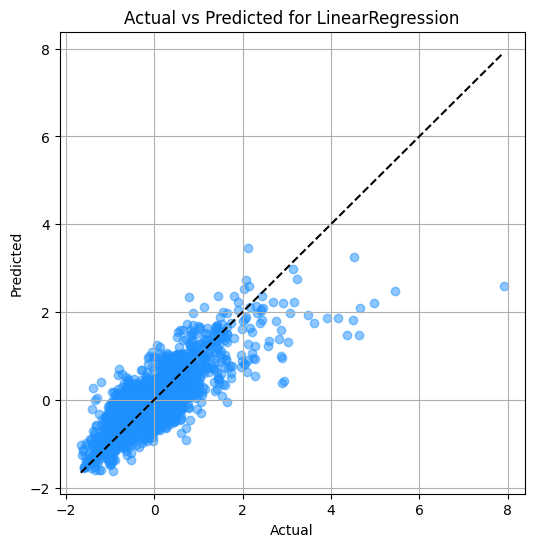

In [57]:
evaluate_regression_model(LinearRegression(), X_train, y_train, X_test, y_test)


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.3860
Mean Squared Error (MSE): 0.2828
Root Mean Squared Error (RMSE): 0.5318
R-squared (R²): 0.6825


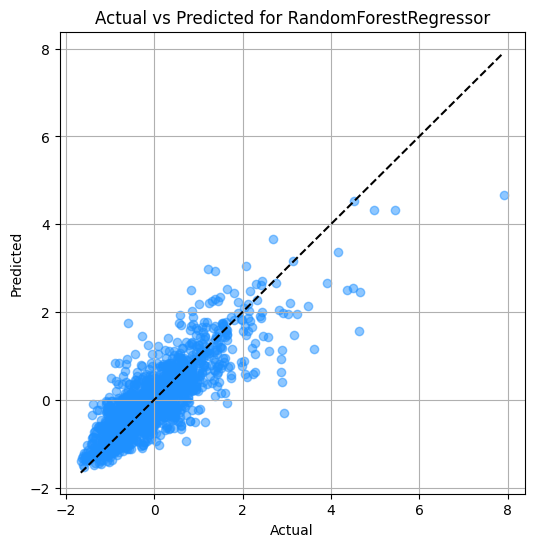

In [58]:
evaluate_regression_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)


Evaluating XGBRegressor:
Mean Absolute Error (MAE): 0.3915
Mean Squared Error (MSE): 0.2814
Root Mean Squared Error (RMSE): 0.5304
R-squared (R²): 0.6840


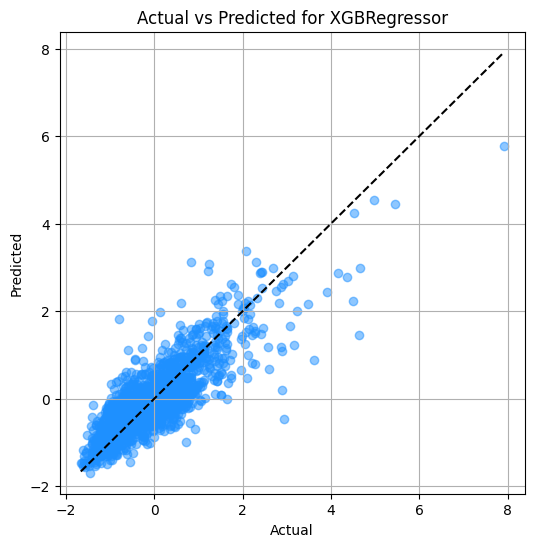

In [60]:
evaluate_regression_model(XGBRegressor(n_estimators=200, random_state=42), X_train, y_train, X_test, y_test)


Evaluating RandomForestRegressor:
Mean Absolute Error (MAE): 0.3830
Mean Squared Error (MSE): 0.2791
Root Mean Squared Error (RMSE): 0.5283
R-squared (R²): 0.6866


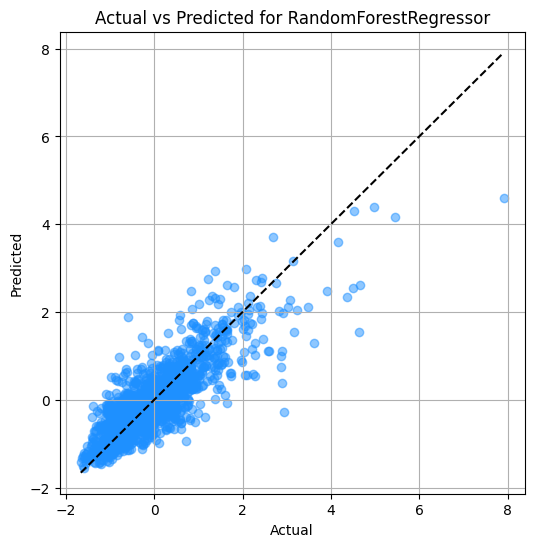

In [61]:
evaluate_regression_model(RandomForestRegressor(n_estimators=200, random_state=42), X_train, y_train, X_test, y_test)



Evaluating Lasso:
Mean Absolute Error (MAE): 0.4941
Mean Squared Error (MSE): 0.4951
Root Mean Squared Error (RMSE): 0.7036
R-squared (R²): 0.4441


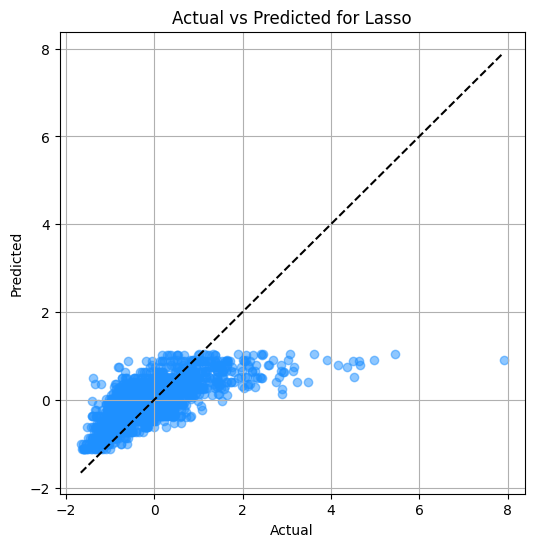

In [62]:
evaluate_regression_model(Lasso(alpha=0.1), X_train, y_train, X_test, y_test)
